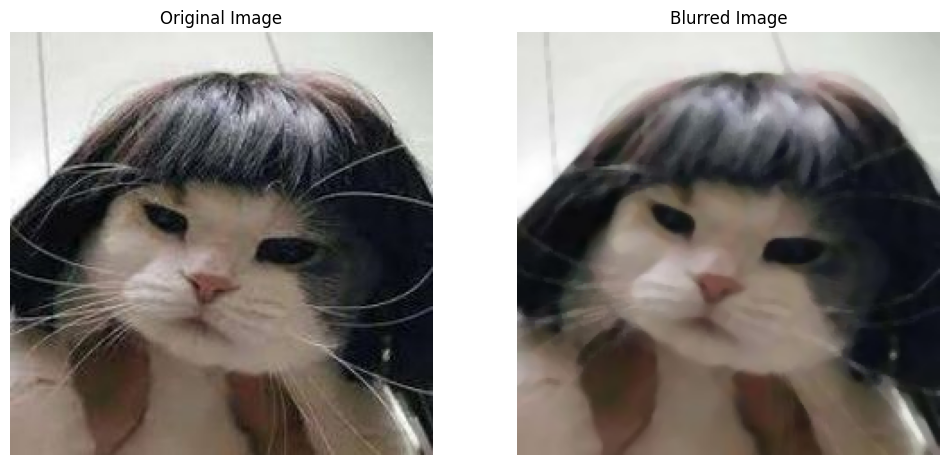

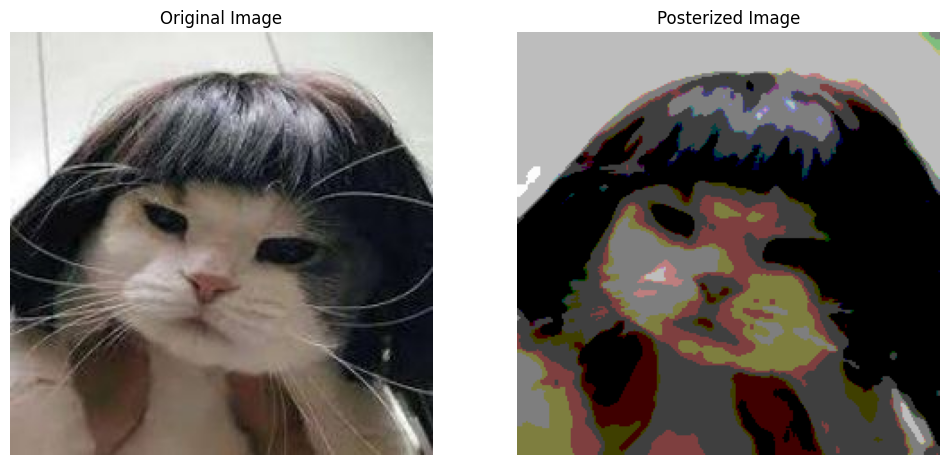

In [1]:
# Import necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read an image (selfie or your favorite celebrity)
# Replace 'path_to_image.jpg' with your image path
image_path = r"C:\Users\rohan\OneDrive\Desktop\Build club\CV_Builder_Series\9c1318551dbc9159f5bcceb977bd7c94.jpg"  # Change this to your image path
image = cv2.imread(image_path)

# Step 2: Convert the input image from BGR to RGB format and apply median blur
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_blurred = cv2.medianBlur(image_rgb, 5)  # Apply median blur

# Display the original and blurred images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_blurred)
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Step 3: Create a Look-Up Table (LUT) for posterization
# Number of levels for posterization
n = 5
# Create LUT
lut = np.zeros(256, dtype=np.uint8)
for i in range(256):
    lut[i] = (i * (n - 1)) // 255 * (255 // (n - 1))

# Step 4: Map input image pixel values according to the Look-Up Table
posterized_image = cv2.LUT(image_blurred, lut)

# Step 5: Display the "Original and Posterized" image side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(posterized_image)
plt.title('Posterized Image')
plt.axis('off')
plt.show()

In [ ]:
# Import necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft

# Step 1: Function to read frames from the input pulse video and collect the green channel
def get_green_channel(video_path):
    cap = cv2.VideoCapture(video_path)
    green_channel_values = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Extract the green channel
        green_channel = frame[:, :, 1]  # OpenCV reads in BGR format
        mean_green = np.mean(green_channel)
        green_channel_values.append(mean_green)

    cap.release()
    return np.array(green_channel_values)

# Step 2: Mean normalize the pixel values collected
def normalize_signal(signal):
    mean_value = np.mean(signal)
    normalized_signal = signal - mean_value
    return normalized_signal

# Step 3: Apply Fast Fourier Transform (FFT) on the signal
def apply_fft(signal):
    N = len(signal)
    T = 1.0 / 30.0  # Assuming a frame rate of 30 FPS
    yf = rfft(signal)
    xf = rfftfreq(N, T)
    return xf, np.abs(yf)

# Step 4: Filter out frequencies outside the human pulse range
def filter_frequencies(frequencies, amplitudes, low_cutoff=0.45, high_cutoff=8.0):
    mask = (frequencies >= low_cutoff) & (frequencies <= high_cutoff)
    return frequencies[mask], amplitudes[mask]

# Step 5: Find the frequency with the highest amplitude
def find_heart_rate(frequencies, amplitudes):
    index = np.argmax(amplitudes)
    heart_rate_bps = frequencies[index]  # Beats per second
    heart_rate_bpm = heart_rate_bps * 60  # Convert to beats per minute
    return heart_rate_bpm

# Main routine
video_path = 'path_to_your_video.mp4'  # Replace with your video file path
green_channel_values = get_green_channel(video_path)

# Mean normalize the signal
normalized_signal = normalize_signal(green_channel_values)

# Plot the normalized signal
plt.figure(figsize=(12, 6))
plt.plot(normalized_signal)
plt.title('Mean Normalized Green Channel Signal')
plt.xlabel('Frame Number')
plt.ylabel('Normalized Intensity')
plt.grid()
plt.show()

# Apply FFT
frequencies, amplitudes = apply_fft(normalized_signal)

# Filter frequencies
filtered_frequencies, filtered_amplitudes = filter_frequencies(frequencies, amplitudes)

# Plot the FFT results
plt.figure(figsize=(12, 6))
plt.plot(filtered_frequencies, filtered_amplitudes)
plt.title('FFT of Normalized Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 10)  # Limit x-axis to show relevant frequencies
plt.show()

# Find the heart rate
heart_rate_bpm = find_heart_rate(filtered_frequencies, filtered_amplitudes)
print(f'Estimated Heart Rate: {heart_rate_bpm:.2f} BPM')

In [ ]:
import cv2

# Callback function to capture mouse clicks
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Coordinates: ({x}, {y})")

# Load a frame from the video to get coordinates
video_path = 'path_to_your_video.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Failed to read video")
    exit()

cv2.imshow("Frame", frame)
cv2.setMouseCallback("Frame", get_coordinates)

# Wait until a key is pressed
cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Function to capture mouse clicks and get the color
def get_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        bgr_color = frame[y, x]
        hsv_color = cv2.cvtColor(np.uint8([[bgr_color]]), cv2.COLOR_BGR2HSV)
        print(f"BGR: {bgr_color}, HSV: {hsv_color[0][0]}")

# Load a frame from the video
video_path = 'path_to_your_video.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Failed to read video")
    exit()

cv2.imshow("Frame", frame)
cv2.setMouseCallback("Frame", get_color)

# Wait until a key is pressed
cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import pandas as pd

# Define the HSV range for the ball (replace with your values)
lower_bound = np.array([30, 100, 100])  # Example lower bound in HSV
upper_bound = np.array([90, 255, 255])  # Example upper bound in HSV

# Function to detect the ball
def detect_ball(frame):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        return cv2.boundingRect(largest_contour)  # Returns (x, y, w, h)
    return None

# Function to determine the quadrant of the ball
def get_quadrant(x, y, width, height):
    if x < width // 2 and y < height // 2:
        return 1
    elif x >= width // 2 and y < height // 2:
        return 2
    elif x < width // 2 and y >= height // 2:
        return 3
    elif x >= width // 2 and y >= height // 2:
        return 4
    return 'out_of_bound'

# Initialize video capture
video_path = 'path_to_your_video.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

bounce_count = 0
bounces_data = []

previous_y = height  # Start above the ground
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Draw grid lines (you can customize the coordinates)
    cv2.line(frame, (width // 2, 0), (width // 2, height), (255, 0, 0), 2)
    cv2.line(frame, (0, height // 2), (width, height // 2), (255, 0, 0), 2)

    ball_info = detect_ball(frame)
    if ball_info:
        x, y, w, h = ball_info
        quadrant = get_quadrant(x + w // 2, y + h // 2, width, height)
        
        # Check for bounce detection
        if previous_y < height // 2 and y >= height // 2:  # Bounce detected
            bounce_count += 1
            time_of_bounce = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000  # Convert to seconds
            bounces_data.append((bounce_count, time_of_bounce, quadrant, int(cap.get(cv2.CAP_PROP_POS_FRAMES))))
            print(f"{bounce_count}, {time_of_bounce:.3f}, {quadrant}, {int(cap.get(cv2.CAP_PROP_POS_FRAMES))}")
        
        previous_y = y + h  # Update the previous y position

    cv2.imshow("Bounce Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save bounce data to CSV
df = pd.DataFrame(bounces_data, columns=["Bounce Number", "Time of Bounce", "Quadrant of Bounce", "Frame Number"])
df.to_csv("bounce_data.csv", index=False)

cap.release()
cv2.destroyAllWindows()